### <i> Liver Cancer Prediction Using Machine Learning Enhancing Early Detection and Survival Analysis </i>
### <i> Dataset Link --> https://www.kaggle.com/datasets/ankushpanday1/liver-cancer-predictions </i>
### <i> Import Library Files </i>

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['JOBLIB_MULTIPROCESSING'] = '0'
os.environ['JOBLIB_START_METHOD'] = 'forkserver'  # Optional, for better compatibility


### <i> Load The Dataset </i>

In [2]:
df = pd.read_csv("liver_cancer_prediction.csv")
df

,Country,Region,Population,Incidence_Rate,Mortality_Rate,Gender,Age,Alcohol_Consumption,Smoking_Status,Hepatitis_B_Status,...,Herbal_Medicine_Use,Healthcare_Access,Screening_Availability,Treatment_Availability,Liver_Transplant_Access,Ethnicity,Preventive_Care,Survival_Rate,Cost_of_Treatment,Prediction
0,Nigeria,Sub-Saharan Africa,340672131,15.381360,6.160480,Male,81,Low,Smoker,Negative,...,No,Poor,Available,Available,No,Hispanic,Good,17.724793,47486.167423,Yes
1,United Kingdom,Europe,1054632817,3.306101,14.392985,Male,87,Low,Smoker,Negative,...,Yes,Good,Available,Not Available,No,Mixed,Moderate,19.558853,13782.265151,No
2,India,South Asia,751241440,9.325053,12.777878,Male,34,Moderate,Smoker,Negative,...,No,Good,Not Available,Not Available,No,Mixed,Moderate,68.468892,25308.034132,No
3,Colombia,South America,1167333367,9.399658,8.634609,Male,63,Low,Non-Smoker,Positive,...,No,Good,Not Available,Not Available,Yes,Hispanic,Moderate,18.200287,38221.622202,No
4,Iran,Middle East,1082070787,9.665663,12.422518,Male,85,High,Non-Smoker,Positive,...,Yes,Moderate,Available,Available,Yes,Mixed,Moderate,45.019153,26765.301404,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160287,Ethiopia,Sub-Saharan Africa,1411302636,23.965864,7.969762,Female,23,High,Smoker,Negative,...,No,Moderate,Not Available,Available,Yes,Asian,Good,11.475246,46329.096464,Yes
160288,China,Eastern Asia,1167902973,18.650467,11.824951,Male,72,High,Non-Smoker,Negative,...,No,Moderate,Available,Available,No,Caucasian,Poor,71.976590,27906.347395,No
160289,Iran,Middle East,1133034701,23.410891,17.751739,Male,45,Moderate,Smoker,Negative,...,No,Moderate,Available,Available,No,Hispanic,Moderate,16.072027,1932.291239,No
160290,Colombia,South America,590438948,9.398881,3.339927,Male,40,Low,Non-Smoker,Negative,...,No,Moderate,Not Available,Not Available,No,African,Moderate,82.063897,39165.859628,No


### <i> Data Overview </i>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160292 entries, 0 to 160291
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Country                  160292 non-null  object 
 1   Region                   160292 non-null  object 
 2   Population               160292 non-null  int64  
 3   Incidence_Rate           160292 non-null  float64
 4   Mortality_Rate           160292 non-null  float64
 5   Gender                   160292 non-null  object 
 6   Age                      160292 non-null  int64  
 7   Alcohol_Consumption      160292 non-null  object 
 8   Smoking_Status           160292 non-null  object 
 9   Hepatitis_B_Status       160292 non-null  object 
 10  Hepatitis_C_Status       160292 non-null  object 
 11  Obesity                  160292 non-null  object 
 12  Diabetes                 160292 non-null  object 
 13  Rural_or_Urban           160292 non-null  object 
 14  Seaf

In [4]:
df.describe()

,Population,Incidence_Rate,Mortality_Rate,Age,Survival_Rate,Cost_of_Treatment
count,1.602920e+05,160292.000000,160292.000000,160292.000000,160292.000000,160292.000000
mean,7.527321e+08,18.523468,15.525234,54.640088,49.957811,25275.608904
std,4.328283e+08,9.513400,8.376871,20.188217,23.036437,14307.105453
min,1.011968e+06,2.000035,1.000080,20.000000,10.000548,500.397303
25%,3.772400e+08,10.319582,8.286968,37.000000,30.129577,12858.138774
50%,7.548388e+08,18.529822,15.565488,55.000000,49.858143,25349.819261
75%,1.126721e+09,26.751354,22.808666,72.000000,69.833652,37672.515875
max,1.499993e+09,34.999952,29.999829,89.000000,89.998005,49999.791824


### <i> Data Visulization And Analysis </i>

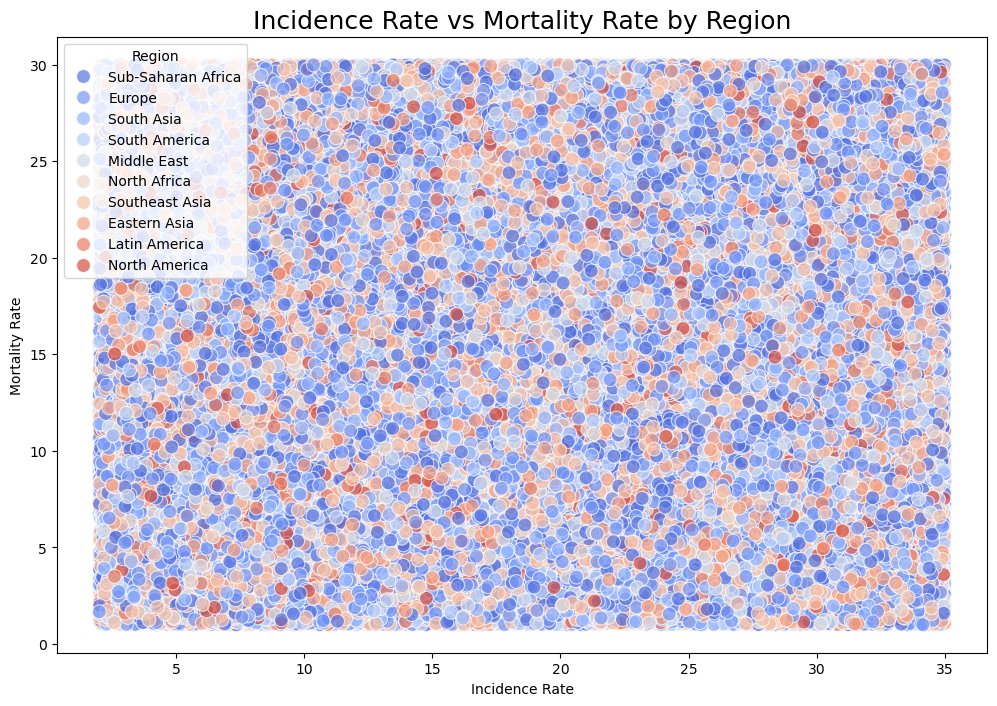

In [5]:
# ========================================
#  Incidence Rate vs Mortality Rate (High-Risk Regions)
# ========================================
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Incidence_Rate', y='Mortality_Rate', hue='Region', alpha=0.7, palette='coolwarm', s=100)
plt.title('Incidence Rate vs Mortality Rate by Region', fontsize=18)
plt.xlabel('Incidence Rate')
plt.ylabel('Mortality Rate')
plt.show()

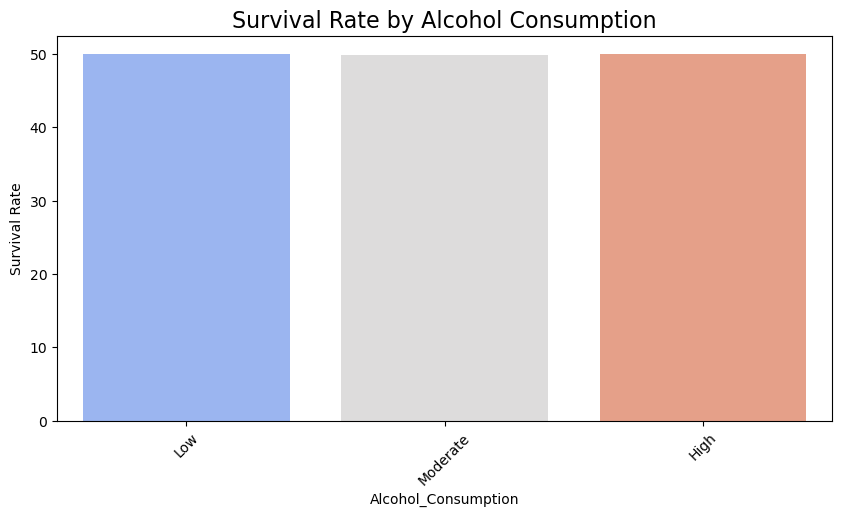

In [6]:
#  Survival Rate by Risk Factors (Alcohol, Smoking, Obesity, Diabetes)
# ========================================
risk_factors = ['Alcohol_Consumption']

for factor in risk_factors:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x=factor, y='Survival_Rate', ci=None, palette='coolwarm')
    plt.title(f'Survival Rate by {factor.replace("_", " ")}', fontsize=16)
    plt.xticks(rotation=45)
    plt.ylabel('Survival Rate')
    plt.show()


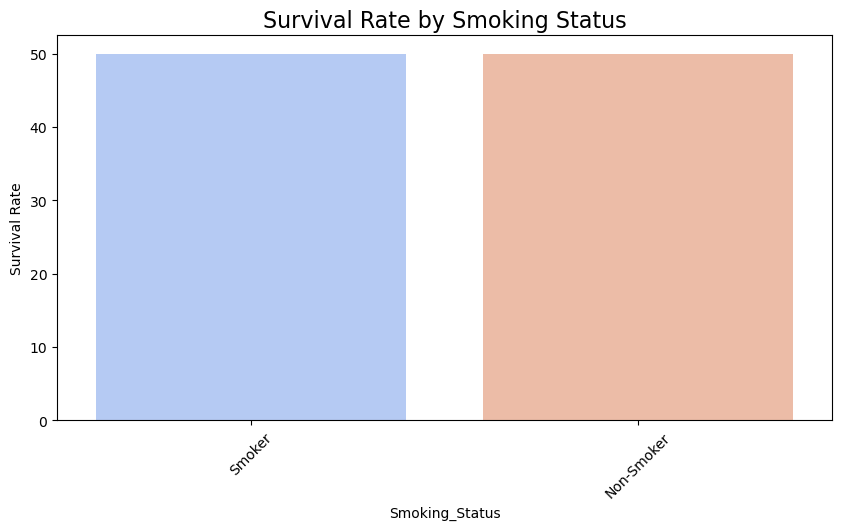

In [7]:
risk_factors = [ 'Smoking_Status']

for factor in risk_factors:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x=factor, y='Survival_Rate', ci=None, palette='coolwarm')
    plt.title(f'Survival Rate by {factor.replace("_", " ")}', fontsize=16)
    plt.xticks(rotation=45)
    plt.ylabel('Survival Rate')
    plt.show()

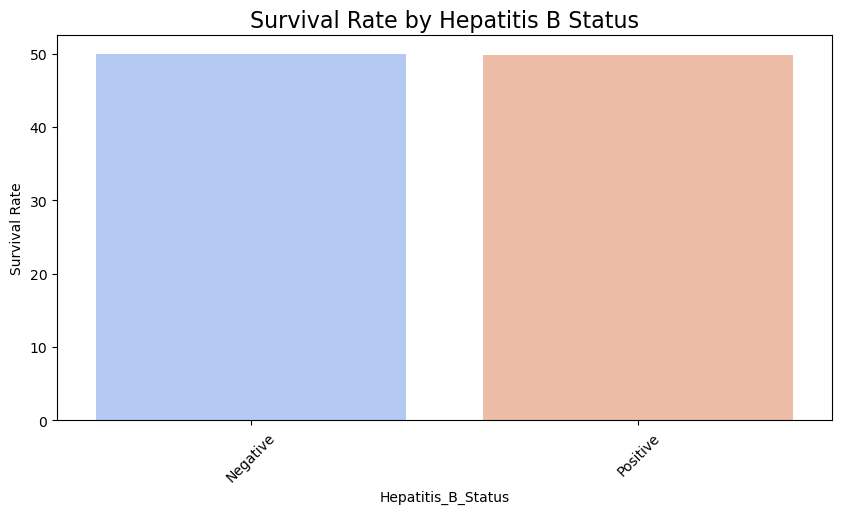

In [8]:
#  Survival Rate by Risk Factors (Alcohol, Smoking, Obesity, Diabetes)
# ========================================
risk_factors = ['Hepatitis_B_Status']

for factor in risk_factors:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x=factor, y='Survival_Rate', ci=None, palette='coolwarm')
    plt.title(f'Survival Rate by {factor.replace("_", " ")}', fontsize=16)
    plt.xticks(rotation=45)
    plt.ylabel('Survival Rate')
    plt.show()


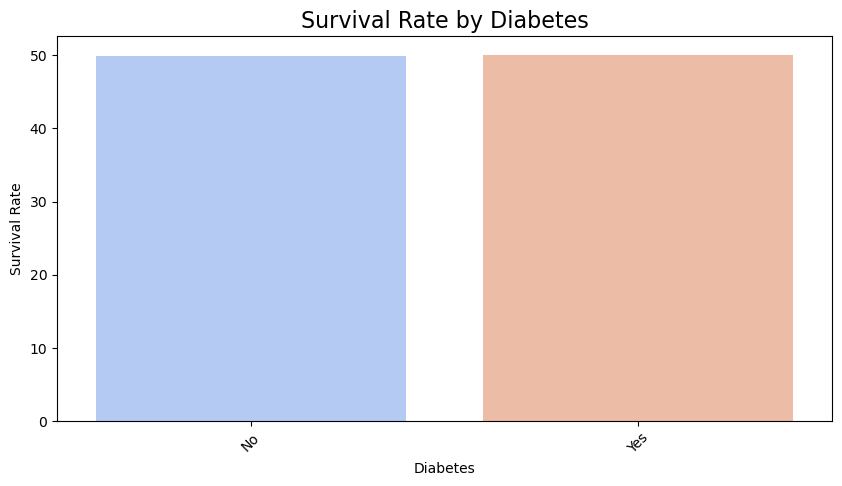

In [9]:
# ========================================
# Survival Rate by Risk Factors (Alcohol, Smoking, Obesity, Diabetes)
# ========================================
risk_factors = ['Diabetes']

for factor in risk_factors:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x=factor, y='Survival_Rate', ci=None, palette='coolwarm')
    plt.title(f'Survival Rate by {factor.replace("_", " ")}', fontsize=16)
    plt.xticks(rotation=45)
    plt.ylabel('Survival Rate')
    plt.show()


<Figure size 1200x600 with 0 Axes>

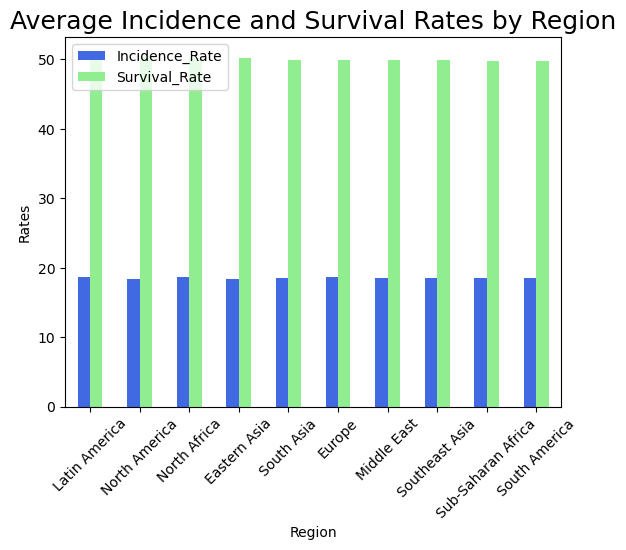

In [10]:
# ========================================
#  Regional Comparison of Survival and Incidence Rates
# ========================================
pivot = df.groupby('Region')[['Incidence_Rate', 'Survival_Rate']].mean().sort_values('Survival_Rate', ascending=False)

plt.figure(figsize=(12, 6))
pivot.plot(kind='bar', stacked=False, color=['royalblue', 'lightgreen'])
plt.title('Average Incidence and Survival Rates by Region', fontsize=18)
plt.ylabel('Rates')
plt.xticks(rotation=45)
plt.show()

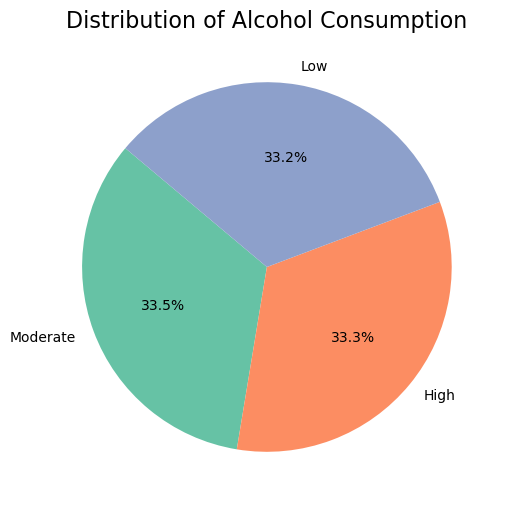

In [11]:
#  Distribution of Key Risk Factors
# ========================================
for factor in ['Alcohol_Consumption']:
    plt.figure(figsize=(6, 6))
    df[factor].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
    plt.title(f'Distribution of {factor.replace("_", " ")}', fontsize=16)
    plt.ylabel('')
    plt.show()

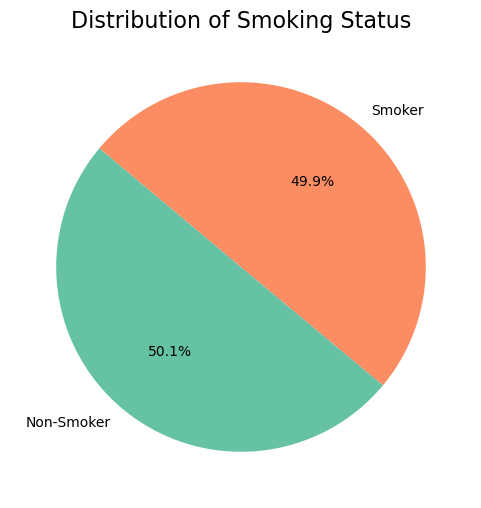

In [12]:
for factor in ['Smoking_Status']:
    plt.figure(figsize=(6, 6))
    df[factor].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
    plt.title(f'Distribution of {factor.replace("_", " ")}', fontsize=16)
    plt.ylabel('')
    plt.show()

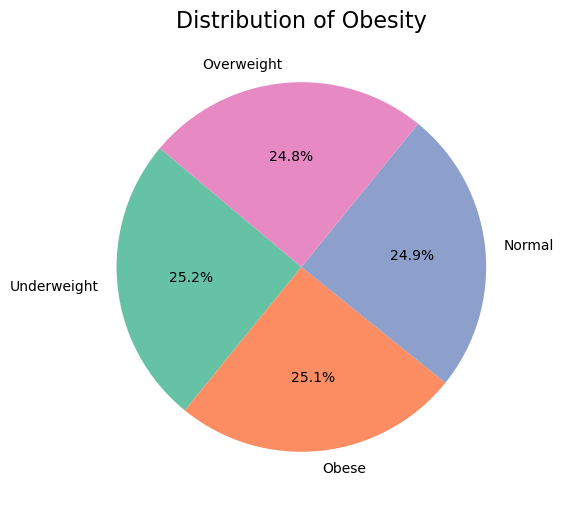

In [13]:
for factor in ['Obesity']:
    plt.figure(figsize=(6, 6))
    df[factor].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
    plt.title(f'Distribution of {factor.replace("_", " ")}', fontsize=16)
    plt.ylabel('')
    plt.show()

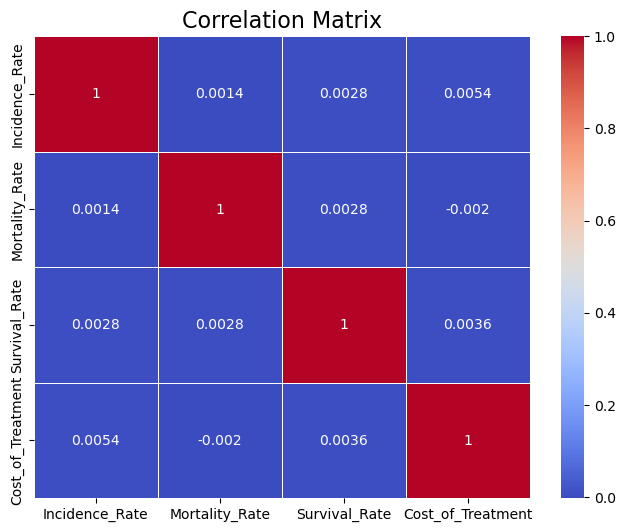

In [14]:
#  Correlation Analysis Between Key Metrics
# ========================================
corr = df[['Incidence_Rate', 'Mortality_Rate', 'Survival_Rate', 'Cost_of_Treatment']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

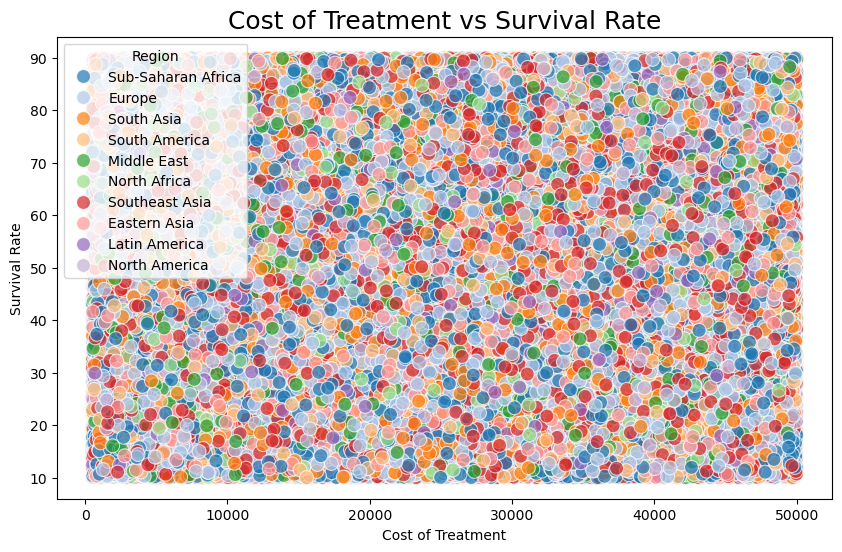

In [15]:
# ========================================
# Cost of Treatment vs Survival Rate
# ========================================
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cost_of_Treatment', y='Survival_Rate', hue='Region', palette='tab20', s=100, alpha=0.7)
plt.title('Cost of Treatment vs Survival Rate', fontsize=18)
plt.xlabel('Cost of Treatment')
plt.ylabel('Survival Rate')
plt.show()

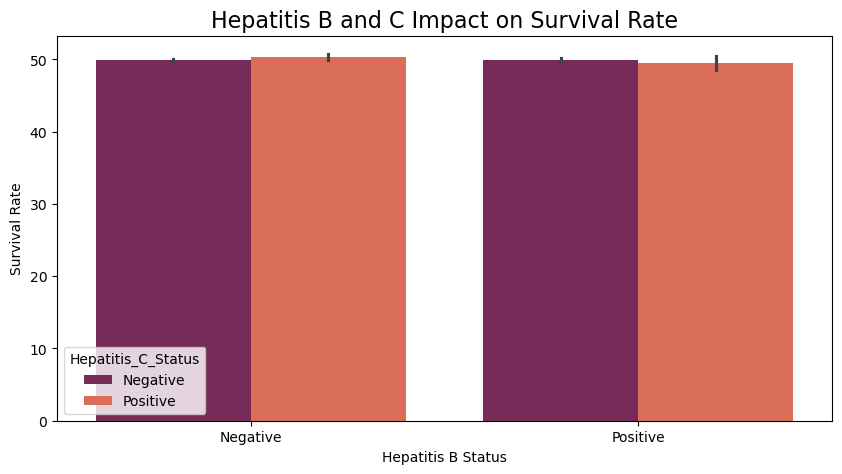

In [16]:
#  Hepatitis B/C Impact on Survival Rate
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Hepatitis_B_Status', y='Survival_Rate', hue='Hepatitis_C_Status', palette='rocket')
plt.title('Hepatitis B and C Impact on Survival Rate', fontsize=16)
plt.xlabel('Hepatitis B Status')
plt.ylabel('Survival Rate')
plt.show()

### <i> Data Preprocessing And Balancing </i>

In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

# ===========================
# Handle Missing Values (if any)
# ===========================
# Filling missing values with appropriate strategies (e.g., mode for categorical, median for numerical)
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# ===========================
# Encode Categorical Variables
# ===========================
categorical_cols = [
    'Country', 'Region', 'Gender', 'Alcohol_Consumption', 'Smoking_Status',
    'Hepatitis_B_Status', 'Hepatitis_C_Status', 'Obesity', 'Diabetes',
    'Rural_or_Urban', 'Seafood_Consumption', 'Herbal_Medicine_Use',
    'Healthcare_Access', 'Screening_Availability', 'Treatment_Availability',
    'Liver_Transplant_Access', 'Ethnicity', 'Preventive_Care', 'Prediction'
]

# Apply Label Encoding for categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# ===========================
# Separate Features and Target
# ===========================
X = df.drop('Prediction', axis=1)
y = df['Prediction']

# ===========================
# Handle Imbalance with SMOTE
# ===========================
print("Before Balancing:", y.value_counts())
smote = SMOTE(random_state=42, n_jobs=1)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("After Balancing:", pd.Series(y_resampled).value_counts())

# ===========================
# Split the Dataset into Training and Testing Sets
# ===========================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42, stratify=y_resampled)

# ===========================
# Feature Scaling (Standardization)
# ===========================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Preprocessing Completed Successfully! 🚀")
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")



Before Balancing: Prediction
0    120270
1     40022
Name: count, dtype: int64
After Balancing: Prediction
1    120270
0    120270
Name: count, dtype: int64
Preprocessing Completed Successfully! 🚀
Training set shape: (180405, 24), Test set shape: (60135, 24)


### <i> Modeling </i>
### <i> Random Forest Classifier </i>

In [18]:
# ===========================
# Random Forest Classifier
# ===========================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))


Random Forest Classifier Results:
Accuracy: 0.7687370083977717
Confusion Matrix:
 [[26699  3369]
 [10538 19529]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.89      0.79     30068
           1       0.85      0.65      0.74     30067

    accuracy                           0.77     60135
   macro avg       0.78      0.77      0.77     60135
weighted avg       0.78      0.77      0.77     60135



### <i> XGBoost Classifier </i>

In [19]:
# ===========================
# XGBoost Classifier
# ===========================
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate performance
print("XGBoost Classifier Results:")
print("Accuracy:", accuracy_score(y_test, xgb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_predictions))
print("Classification Report:\n", classification_report(y_test, xgb_predictions))


XGBoost Classifier Results:
Accuracy: 0.7945622349713145
Confusion Matrix:
 [[27836  2232]
 [10122 19945]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.93      0.82     30068
           1       0.90      0.66      0.76     30067

    accuracy                           0.79     60135
   macro avg       0.82      0.79      0.79     60135
weighted avg       0.82      0.79      0.79     60135



### <i> Logistic Regression </i>

In [20]:
# ===========================
# Logistic Regression
# ===========================
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test)

# Evaluate performance
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_predictions))
print("Classification Report:\n", classification_report(y_test, lr_predictions))


Logistic Regression Results:
Accuracy: 0.7097696848756964
Confusion Matrix:
 [[21285  8783]
 [ 8670 21397]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71     30068
           1       0.71      0.71      0.71     30067

    accuracy                           0.71     60135
   macro avg       0.71      0.71      0.71     60135
weighted avg       0.71      0.71      0.71     60135



### <i> Model Comparison </i>

Model Comparison Results:
                      Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.709770   0.709773  0.709770  0.709769
Random Forest        0.768737   0.784934  0.768737  0.765402
XGBoost              0.794562   0.816345  0.794562  0.790963


<Figure size 1200x800 with 0 Axes>

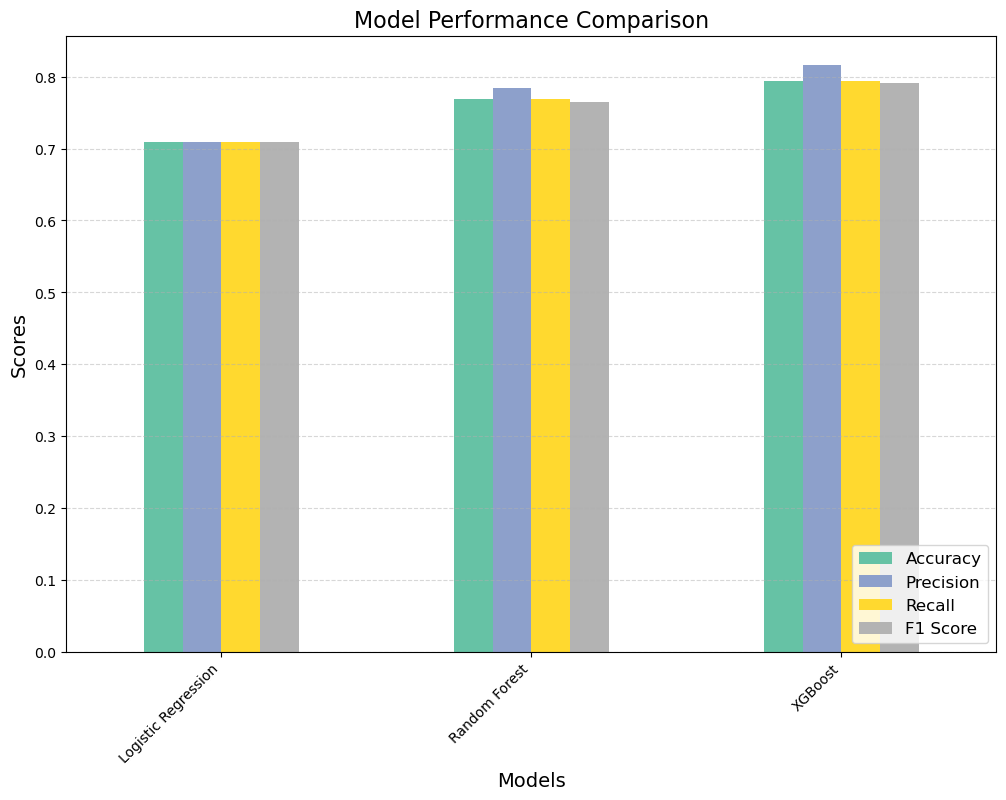

In [21]:
# ==========================================
# Model Comparison Code: Logistic Regression, Random Forest, XGBoost
# ==========================================
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Dictionary to store results
model_results = {}

# 1️⃣ Logistic Regression
lr_predictions = lr_model.predict(X_test)
model_results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, lr_predictions),
    'Precision': precision_score(y_test, lr_predictions, average='weighted'),
    'Recall': recall_score(y_test, lr_predictions, average='weighted'),
    'F1 Score': f1_score(y_test, lr_predictions, average='weighted')
}

# 2️⃣ Random Forest
rf_predictions = rf_model.predict(X_test)
model_results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, rf_predictions),
    'Precision': precision_score(y_test, rf_predictions, average='weighted'),
    'Recall': recall_score(y_test, rf_predictions, average='weighted'),
    'F1 Score': f1_score(y_test, rf_predictions, average='weighted')
}

# 3️⃣ XGBoost
xgb_predictions = xgb_model.predict(X_test)
model_results['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, xgb_predictions),
    'Precision': precision_score(y_test, xgb_predictions, average='weighted'),
    'Recall': recall_score(y_test, xgb_predictions, average='weighted'),
    'F1 Score': f1_score(y_test, xgb_predictions, average='weighted')
}

# Convert results to DataFrame
results_df = pd.DataFrame(model_results).T
print("Model Comparison Results:\n", results_df)

# ==========================================
# Visualize Model Performance
# ==========================================
plt.figure(figsize=(12, 8))
results_df.plot(kind='bar', figsize=(12, 8), colormap='Set2')
plt.title("Model Performance Comparison", fontsize=16)
plt.ylabel("Scores", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(loc="lower right", fontsize=12)
plt.show()
